In [5]:
!pip install --upgrade pip 
!pip install --upgrade plotly seaborn sklearn statsmodels klib celluloid kaggle

     |████████████████████████████████| 2.1 MB 13.7 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all th

In [3]:
import os

os.environ['KAGGLE_USERNAME'] = "alialiabadi"
os.environ['KAGGLE_KEY'] = "ff8fb2b01c8be851bf5cb86b1ac6a8a0"

# !kaggle competitions download -c talkingdata-adtracking-fraud-detection
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

!unzip mobile-price-classification.zip

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 50.4MB/s]
Archive:  mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import klib

import plotly.express as px
from pylab import figure
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_fscore_support
from sklearn.decomposition import PCA
from sklearn.utils import resample


%matplotlib inline


In [7]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [5]:
train_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
# Plot corrdinates

fig = px.imshow(train_df.corr())
fig.show()

In [7]:
klib.missingval_plot(train_df)

No missing values found in the dataset.


In [8]:
# So there is no null value. to make sure we count them
train_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
train_df.price_range.nunique()


4

In [11]:
train_df.groupby(['price_range']).count()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
1,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
2,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
3,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500


Text(0, 0.5, 'count')

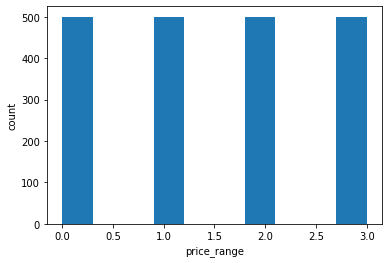

In [12]:
plt.hist(train_df.price_range)
plt.xlabel('price_range')
plt.ylabel('count')

In [1]:
from sklearn.metrics import auc

def forward_selection(X, y):
  features = []
  final_features = {'features': [], 'scores': []}
  rem_features = X.columns
  for i in range(len(X.columns)):
    max_score = 0
    best_feature = ""
    best_score = 0
    for feature in set(rem_features) -set(features):
      new_X = X[features + [feature]]
      X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=0)
      logisticRegr = LogisticRegression()
      logisticRegr.fit(X_train, y_train)
      score = logisticRegr.score(X_test, y_test)
      if score > max_score :
        max_score = score
        best_feature = feature
        best_score = score
    rem_features = rem_features.drop(best_feature)
    features.append(best_feature)

    final_features['features'].append(best_feature)
    final_features['scores'].append(best_score)
  final_features['features_rank'] = range(len(X.columns))

  best_index = 0
  mx_feature = 0
  for i in range(len(final_features['scores'])):
    if final_features['scores'][i] > mx_feature:
      mx_feature = final_features['scores'][i] 
      best_index = i

  final_features['best_features'] = final_features['features'][:best_index]
  return final_features

In [8]:
x_train, x_test, y_train, y_test = train_test_split(train_df.drop(columns=['price_range']), train_df.price_range, test_size=0.2, random_state=0)

In [9]:
#separate minroty and majority classes
train_df_majority = train_df[train_df['price_range'] == 1].copy()
train_df_minority = train_df[train_df['price_range'] == 0].copy()

#upsampling minority class
train_df_minority_upsampled = resample(train_df_minority, replace=True, n_samples=1500, random_state=123)

#combind majority class with upsampled minority class
train_df_upsampled = pd.concat([train_df_majority, train_df_minority_upsampled])

train_df_upsampled.price_range.value_counts()

0    1500
1     500
Name: price_range, dtype: int64

In [10]:
x_train_ups, x_test_ups, y_train_ups, y_test_ups = train_test_split(train_df_upsampled.drop(columns=['price_range']), 
                                                                    train_df_upsampled.price_range, test_size=0.2, random_state=0)

In [11]:
x_train_ups.shape, x_test_ups.shape, y_train_ups.shape, y_test_ups.shape


((1600, 20), (400, 20), (1600,), (400,))

In [12]:
standard_scaler = StandardScaler()
x_train[x_train.columns] = standard_scaler.fit_transform(x_train[x_train.columns])


x_test[x_test.columns] = standard_scaler.transform(x_test[x_test.columns])

In [13]:
x_train.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
582,-0.001608,-0.965592,1.671035,0.983880,-0.748114,0.976525,-0.430667,-0.692543,0.852842,0.216380,1.183752,-0.660982,-1.042159,-0.786095,0.882404,0.951809,0.911171,0.564840,-0.986343,-1.025320
159,1.374075,-0.965592,-1.270550,0.983880,1.810037,-1.024039,0.119443,0.693843,0.084708,-1.543255,1.018941,-0.773314,0.655005,-0.952286,-1.032614,-1.324225,-0.183466,-1.770414,-0.986343,-1.025320
1827,1.039205,-0.965592,0.690506,-1.016384,-0.050436,0.976525,-1.640908,1.387036,-0.939471,-1.543255,1.183752,2.794355,1.482833,1.555428,-0.793236,-0.641415,-0.730784,0.564840,1.013846,0.975305
318,-1.639756,-0.965592,-0.902852,-1.016384,0.647241,0.976525,0.559530,-0.692543,-1.280863,-1.543255,-0.299543,-1.384401,-1.623253,-1.337588,0.164273,1.407015,-0.730784,0.564840,-0.986343,-1.025320
708,-0.578580,1.035635,1.548469,0.983880,-0.515555,-1.024039,0.174453,0.347246,0.739044,-1.103346,0.854131,1.902438,1.385984,1.495079,1.600536,-0.641415,-0.183466,-1.770414,1.013846,0.975305


In [14]:
y_train.head()


582     0
159     1
1827    3
318     0
708     3
Name: price_range, dtype: int64

In [15]:
fs = forward_selection(x_train, y_train)


In [16]:
fs

{'best_features': ['ram',
  'battery_power',
  'px_height',
  'px_width',
  'mobile_wt',
  'sc_h'],
 'features': ['ram',
  'battery_power',
  'px_height',
  'px_width',
  'mobile_wt',
  'sc_h',
  'fc',
  'sc_w',
  'pc',
  'n_cores',
  'clock_speed',
  'touch_screen',
  'm_dep',
  'int_memory',
  'wifi',
  'dual_sim',
  'blue',
  'three_g',
  'talk_time',
  'four_g'],
 'features_rank': range(0, 20),
 'scores': [0.775,
  0.84375,
  0.915625,
  0.953125,
  0.98125,
  0.984375,
  0.9875,
  0.9875,
  0.9875,
  0.98125,
  0.98125,
  0.98125,
  0.978125,
  0.975,
  0.971875,
  0.975,
  0.971875,
  0.96875,
  0.965625,
  0.953125]}

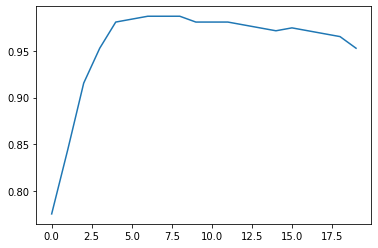

In [17]:
plt.plot(fs['features_rank'], fs['scores'])

In [18]:
print(fs['best_features'])


['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt', 'sc_h']


In [23]:
logisticReg = LogisticRegression()
logisticReg.fit(x_train[['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt', 'sc_h']], y_train)
y_prd = logisticReg.predict(x_test[['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt', 'sc_h']])

y_prd

array([3, 0, 2, 2, 2, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 1, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 2, 1, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [24]:
percision, recall, f1score, support = precision_recall_fscore_support(y_test, y_prd)
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

percision: [0.9893617  0.93814433 0.98958333 1.        ]
recall: [0.97894737 0.98913043 0.95959596 0.99122807]
f1score: [0.98412698 0.96296296 0.97435897 0.99559471]


In [27]:
x_pca = train_df.drop(columns=['price_range'])
y_pca = train_df.price_range

pca = PCA(n_components=5)
x_pca = pca.fit_transform(x_pca)
x_pca.shape

(2000, 5)

In [28]:
x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca, y_pca, test_size=0.2, random_state=0)


In [29]:
logisticReg = LogisticRegression()
logisticReg.fit(x_pca_train, y_pca_train)
y_prd = logisticReg.predict(x_pca_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [30]:
percision, recall, f1score, support = precision_recall_fscore_support(y_pca_test, y_prd)
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

percision: [0.54285714 0.86666667 1.         0.61621622]
recall: [1.         0.14130435 0.25252525 1.        ]
f1score: [0.7037037  0.24299065 0.40322581 0.76254181]


### Binning Battery

In [40]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


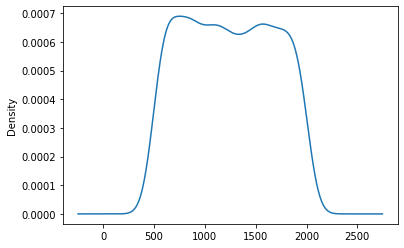

In [36]:
train_df.battery_power.plot(kind='kde')

In [46]:
train_df[train_df['battery_power'] < 800]['battrey_power'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
train_df[train_df['battery_power'] < 800]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
15,775,0,1.0,0,3,0,46,0.7,159,2,...,862,1864,568,17,15,11,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,618,1,1.0,0,9,1,13,0.1,80,4,...,591,724,1424,15,12,7,1,1,0,0
1989,586,0,2.8,0,2,0,15,0.2,83,3,...,241,854,2592,12,8,3,0,0,0,1
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0


## Backward selection

In [48]:
def backward_selection(X, y):
  features = X.columns
  final_features = {'features': [], 'scores': []}
  rem_features = X.columns
  for i in range(len(X.columns)):
    max_score = 0
    worst_feature = ""
    worst_score = 0
    for feature in rem_features:
      new_X = X[features.drop(feature)]
      X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=0)
      logisticRegr = LogisticRegression()
      logisticRegr.fit(X_train, y_train)
      score = logisticRegr.score(X_test, y_test)
      if score > max_score :
        max_score = score
        worst_feature = feature
        worst_score = score
    rem_features = rem_features.drop(worst_feature)
    features.drop(worst_feature)

    final_features['features'].append(worst_feature)
    final_features['scores'].append(worst_score)
  final_features['features_rank'] = range(len(X.columns))

  best_index = 0
  mx_feature = 0
  for i in range(len(final_features['scores'])):
    if final_features['scores'][i] > mx_feature:
      mx_feature = final_features['scores'][i] 
      best_index = i

  final_features['best_features'] = final_features['features'][:best_index]

  
  return final_features

In [49]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
582,-0.001608,-0.965592,1.671035,0.983880,-0.748114,0.976525,-0.430667,-0.692543,0.852842,0.216380,1.183752,-0.660982,-1.042159,-0.786095,0.882404,0.951809,0.911171,0.564840,-0.986343,-1.025320
159,1.374075,-0.965592,-1.270550,0.983880,1.810037,-1.024039,0.119443,0.693843,0.084708,-1.543255,1.018941,-0.773314,0.655005,-0.952286,-1.032614,-1.324225,-0.183466,-1.770414,-0.986343,-1.025320
1827,1.039205,-0.965592,0.690506,-1.016384,-0.050436,0.976525,-1.640908,1.387036,-0.939471,-1.543255,1.183752,2.794355,1.482833,1.555428,-0.793236,-0.641415,-0.730784,0.564840,1.013846,0.975305
318,-1.639756,-0.965592,-0.902852,-1.016384,0.647241,0.976525,0.559530,-0.692543,-1.280863,-1.543255,-0.299543,-1.384401,-1.623253,-1.337588,0.164273,1.407015,-0.730784,0.564840,-0.986343,-1.025320
708,-0.578580,1.035635,1.548469,0.983880,-0.515555,-1.024039,0.174453,0.347246,0.739044,-1.103346,0.854131,1.902438,1.385984,1.495079,1.600536,-0.641415,-0.183466,-1.770414,1.013846,0.975305


In [50]:
bs = backward_selection(x_train, y_train)
bs

{'best_features': [],
 'features': ['four_g',
  'm_dep',
  'n_cores',
  'fc',
  'sc_h',
  'three_g',
  'dual_sim',
  'talk_time',
  'clock_speed',
  'sc_w',
  'touch_screen',
  'wifi',
  'blue',
  'pc',
  'int_memory',
  'mobile_wt',
  'px_width',
  'px_height',
  'battery_power',
  'ram'],
 'features_rank': range(0, 20),
 'scores': [0.965625,
  0.965625,
  0.9625,
  0.959375,
  0.959375,
  0.959375,
  0.95625,
  0.95625,
  0.953125,
  0.953125,
  0.953125,
  0.953125,
  0.95,
  0.946875,
  0.940625,
  0.91875,
  0.9125,
  0.89375,
  0.765625,
  0.3125]}

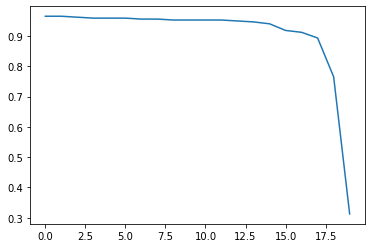

In [51]:
plt.plot(bs['features_rank'], bs['scores'])


In [52]:
logisticReg = LogisticRegression()
logisticReg.fit(x_train[['sc_h', 'three_g', 'dual_sim', 'talk_time', 'clock_speed', 'sc_w', 'touch_screen',
                        'wifi', 'blue', 'pc', 'int_memory', 'mobile_wt', 'px_width', 'px_height', 'battery_power', 'ram']], y_train)
y_prd = logisticReg.predict(x_test[['sc_h', 'three_g', 'dual_sim', 'talk_time', 'clock_speed', 'sc_w', 'touch_screen',
                                   'wifi', 'blue', 'pc', 'int_memory', 'mobile_wt', 'px_width', 'px_height', 'battery_power', 'ram']])

In [53]:
percision, recall, f1score, support = precision_recall_fscore_support(y_test, y_prd)
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

percision: [0.97894737 0.89795918 0.95555556 0.95726496]
recall: [0.97894737 0.95652174 0.86868687 0.98245614]
f1score: [0.97894737 0.92631579 0.91005291 0.96969697]


In [54]:
from sklearn.model_selection import cross_val_score

logisticReg = LogisticRegression()
scores_5 = cross_val_score(logisticReg, x_train, y_train, cv=5)
print(scores_5)
scores_10 = cross_val_score(logisticReg, x_train, y_train, cv=10)
print(scores_10)

[0.965625 0.95625  0.9625   0.95     0.971875]
[0.96875 0.96875 0.96875 0.9625  0.96875 0.95    0.9625  0.93125 0.9875
 0.95   ]
